<a href="https://colab.research.google.com/github/HomerTheChicken/PHYS3025Work/blob/main/Homework/HW1Q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from astropy.table import Table
!pip install astroquery
import astroquery
from astroquery.vizier import Vizier
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
%matplotlib inline

In [2]:
v = Vizier(columns=['B-V', 'Vmag', 'Plx', 'e_Plx', 'SpType'], column_filters={'Vmag': '!='}, row_limit=-1)
result = v.query_constraints(catalog='V/137D')
data_clean = result[0][result[0]['e_Plx']<5]
data_clean = data_clean[data_clean['B-V']<=2]
data_clean = data_clean[data_clean['B-V']<=2]
Vmag = data_clean['Vmag'].data.data

In [3]:
distance = 1/data_clean['Plx'].data.data*10**3
M_v = Vmag - 5*np.log10(distance)+5
BV = data_clean['B-V'].data.data

<ipython-input-3-95f8b38d80e6>:1: RuntimeWarning: divide by zero encountered in divide
  distance = 1/data_clean['Plx'].data.data*10**3
<ipython-input-3-95f8b38d80e6>:2: RuntimeWarning: invalid value encountered in log10
  M_v = Vmag - 5*np.log10(distance)+5


Text(0, 0.5, 'Absolute visual magnitude')

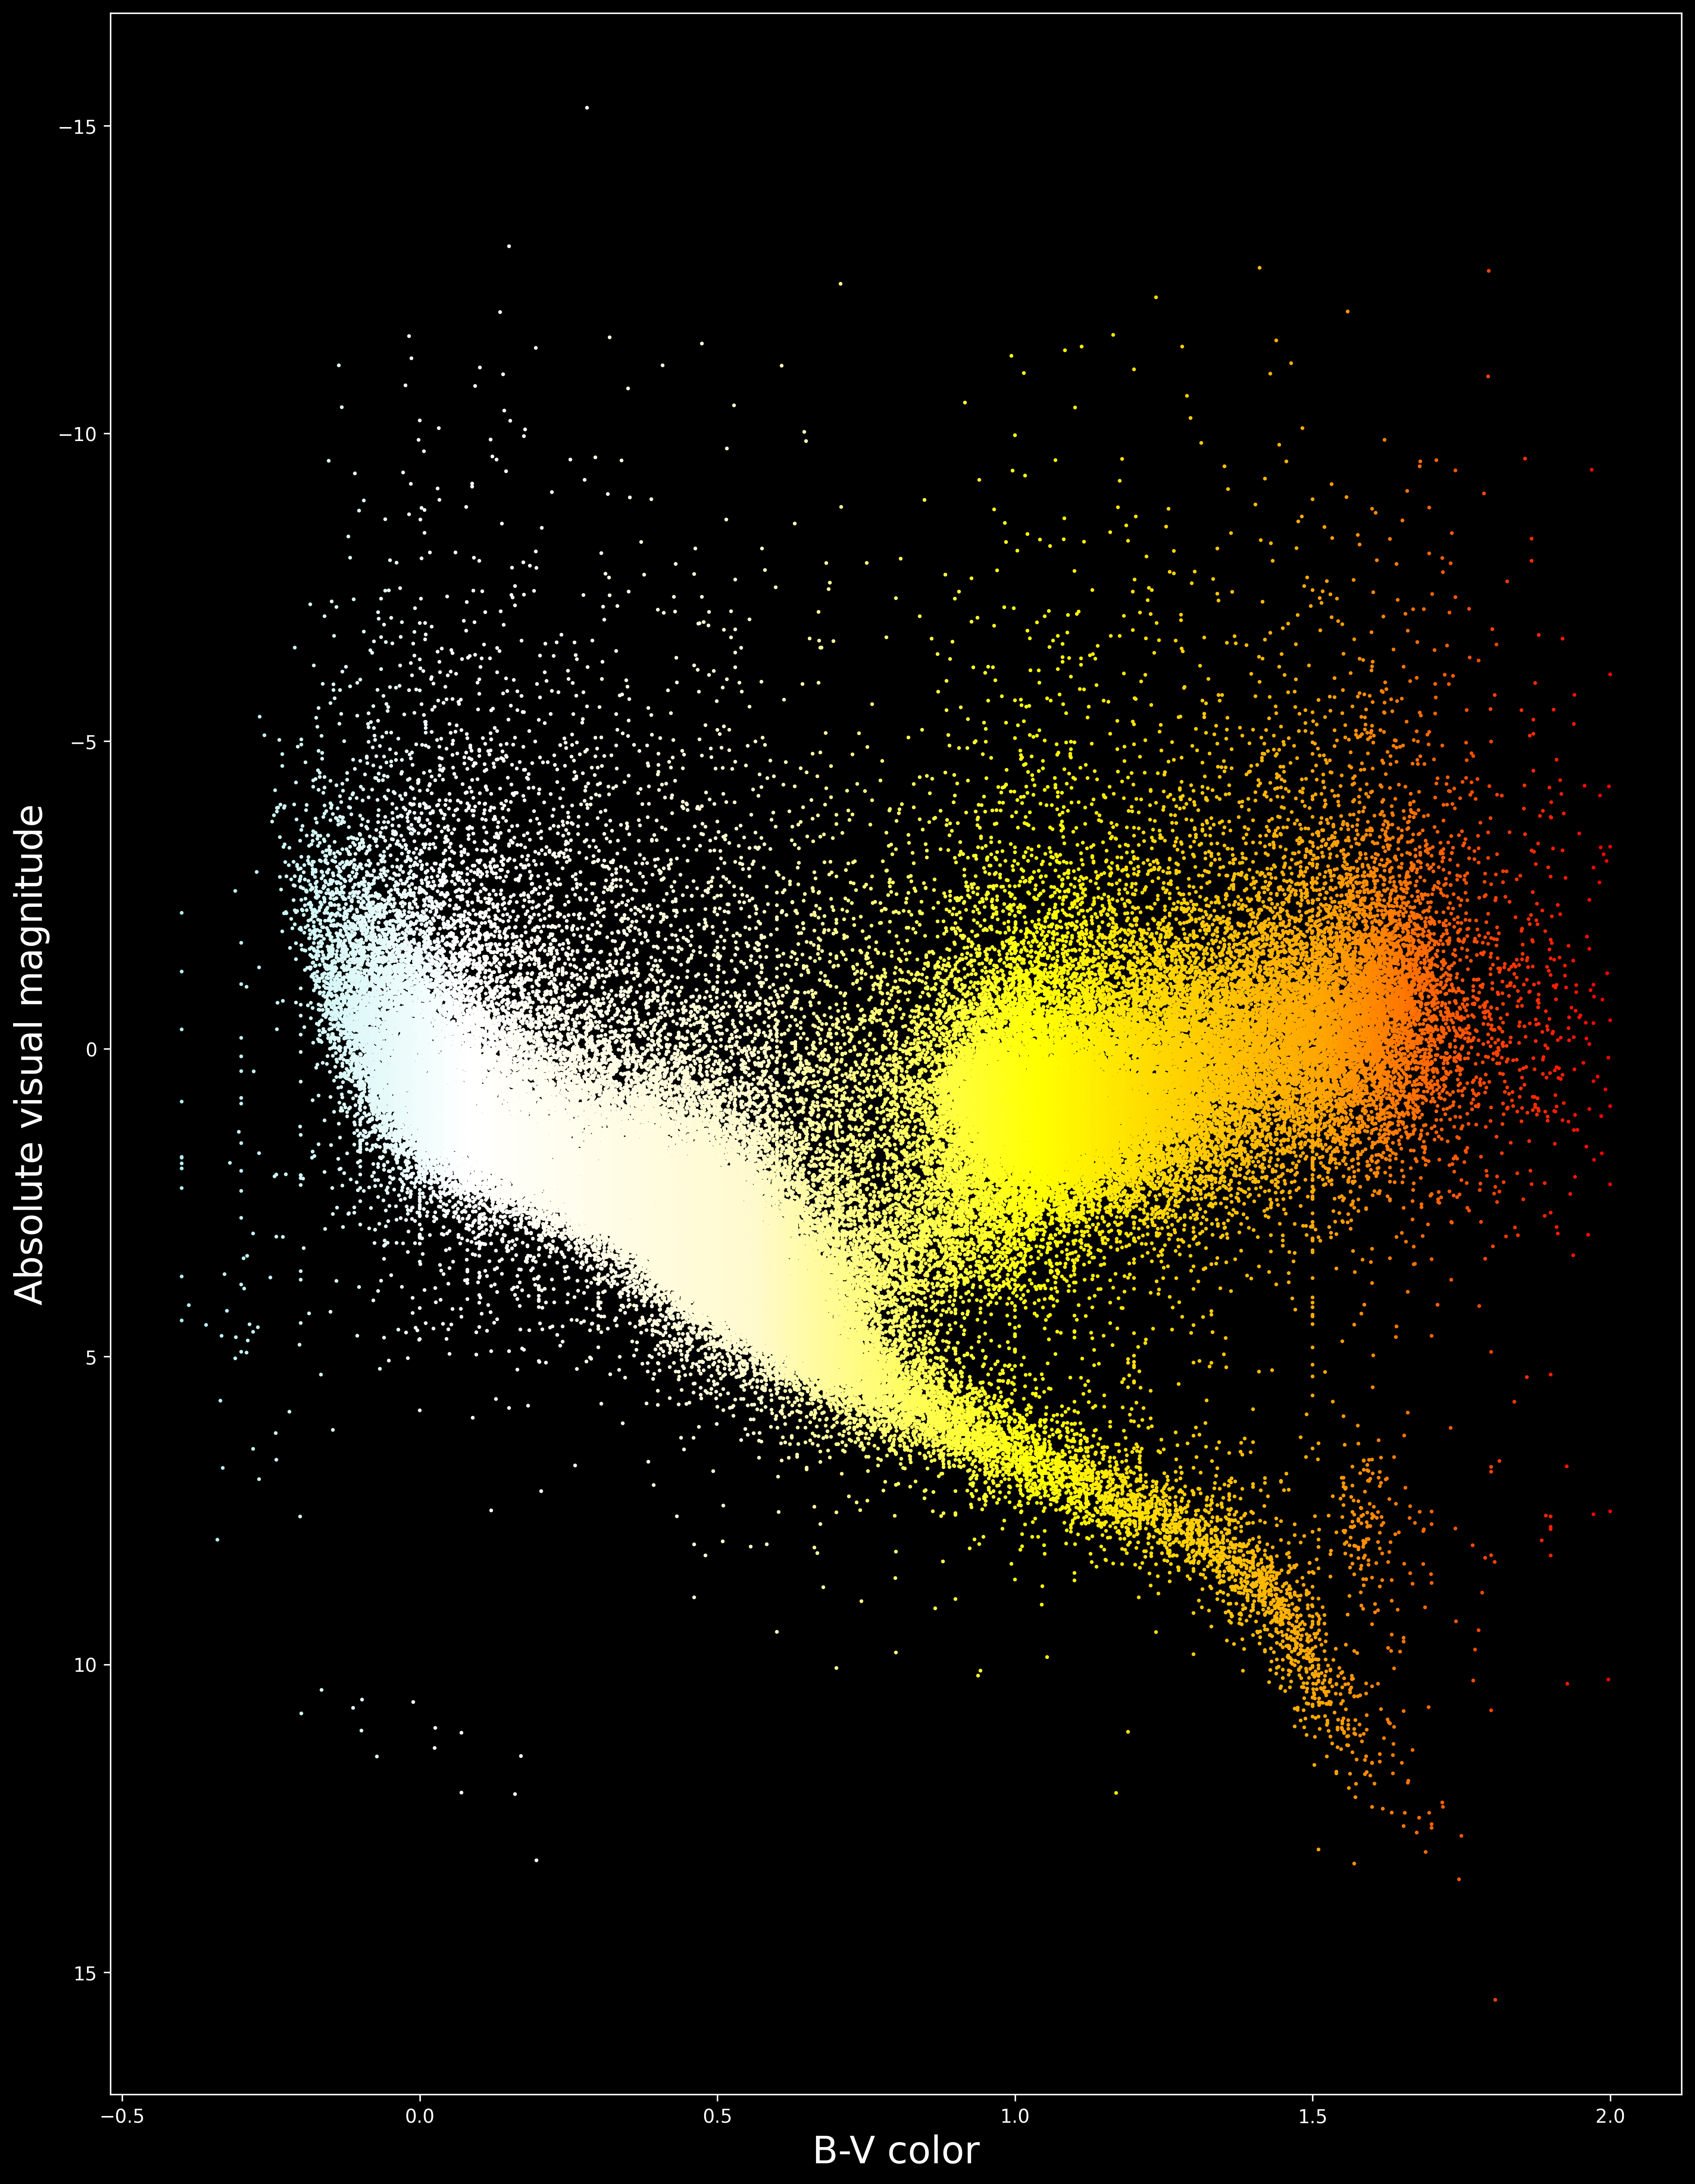

In [28]:
colors = ['paleturquoise', 'lemonchiffon', 'gold',  'darkorange', 'red']
fakecolors = matplotlib.colors.ListedColormap(colors)
plt.style.use('dark_background')
plt.figure(figsize=(15, 20), dpi=300)
plt.scatter(BV, M_v, s=1, c=BV, cmap='fakecolors')
plt.ylim(reversed(plt.ylim()))
plt.xlabel("B-V color", fontsize=20)
plt.ylabel("Absolute visual magnitude", fontsize=20)